In [18]:
import typing
import itertools

import numpy
import pandas 

import scipy
import statsmodels
import statsmodels.stats
import statsmodels.stats.descriptivestats

import seaborn

import llm_questionnaires as llmq

In [19]:
MODELS: typing.List[str] = llmq.CONSTANTS.MODELS[:-1]
MODELS

['llama3.1-8b',
 'llama3.3-70b',
 'mistral-7b',
 'mistral-large-123b',
 'qwen2.5-7b']

In [20]:
COLUMNS: typing.List[str] = [col[0] + str(col[1]) for col in itertools.product("ENCAO" , range(1, 11))]

In [21]:
raw: typing.Dict[str, pandas.DataFrame]= {
    **llmq.evaluation.read_populations("data/base", MODELS, COLUMNS),
    "human_full": (
        pandas.read_csv("../../../data/big_5/survey.csv")
        .rename_axis(index="participant")
        .filter(regex='E|N|C|A|O', axis=1)
        .replace(-1, None)
        .apply(pandas.to_numeric)
    ),
    "random": (
        pandas.DataFrame(numpy.random.randint(0,5, (1000, 50)), columns=COLUMNS)
        .rename_axis(index="participant")
    )
}

raw.keys()

dict_keys(['llama3.1-8b', 'llama3.3-70b', 'mistral-7b', 'mistral-large-123b', 'qwen2.5-7b', 'human_full', 'random'])

In [22]:
for key, values in raw.items():
    values.to_csv(f"reports/raw.{key}.csv", index=False)

In [23]:
descriptive = pandas.concat({
    key: statsmodels.stats.descriptivestats.describe(values).T
    for key, values in raw.items()
})
descriptive

/home/ubuntu/repositories/LLM-Questionnaires/.venv/lib/python3.12/site-packages/statsmodels/stats/stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
/home/ubuntu/repositories/LLM-Questionnaires/.venv/lib/python3.12/site-packages/statsmodels/stats/stattools.py:126: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = 3 + stats.kurtosis(resids, axis=axis)
/home/ubuntu/repositories/LLM-Questionnaires/.venv/lib/python3.12/site-packages/statsmodels/stats/stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
/home/ubun

nobs  missing      mean   std_err  upper_ci  lower_ci  \
llama3.1-8b E1    500.0      8.0  3.376016  0.050474  3.474944  3.277089   
            E2    500.0     17.0  3.291925  0.056449  3.402564  3.181287   
            E3    500.0     19.0  4.101871  0.032376  4.165327  4.038415   
            E4    500.0     23.0  3.111111  0.064858  3.238231  2.983992   
            E5    500.0     31.0  3.611940  0.070061  3.749257  3.474624   
...                 ...      ...       ...       ...       ...       ...   
random      O6   1000.0      0.0  1.995000  0.045990  2.085139  1.904861   
            O7   1000.0      0.0  1.932000  0.044737  2.019682  1.844318   
            O8   1000.0      0.0  2.004000  0.044989  2.092177  1.915823   
            O9   1000.0      0.0  1.944000  0.044820  2.031846  1.856154   
            O10  1000.0      0.0  1.935000  0.043711  2.020673  1.849327   

                      std  iqr  iqr_normal       mad  ...  median   1%   5%  \
llama3.1-8b E1   1.119569  2.0    1.482602  0.968959  ...     4.0  1.0  2.0   
            E2   1.240598  2.0    1.482602  1.114489  ...     3.0  1.0  2.0   
            E3   0.710059  1.0    0.741301  0.515350  ...     4.0  2.0  3.0   
            E4   1.416522  2.0    1.482602  1.210342  ...     3.0  1.0  1.0   
            E5   1.517260  3.0    2.223903  1.339592  ...     4.0  1.0  1.0   
...                   ...  ...         ...       ...  ...     ...  ...  ...   
random      O6   1.454335  2.0    1.482602  1.253830  ...     2.0  0.0  0.0   
            O7   1.414700  2.0    1.482602  1.221928  ...     2.0  0.0  0.0   
            O8   1.422676  2.0    1.482602  1.206696  ...     2.0  0.0  0.0   
            O9   1.417347  2.0    1.482602  1.215296  ...     2.0  0.0  0.0   
            O10  1.382276  2.0    1.482602  1.174180  ...     2.0  0.0  0.0   

                 10%  25%  50%  75%  90%  95%  99%  
llama3.1-8b E1   2.0  2.0  4.0  4.0  5.0  5.0  5.0  
            E2   2.0  2.0  3.0  4.0  5.0  5.0  5.0  
            E3   3.0  4.0  4.0  5.0  5.0  5.0  5.0  
            E4   1.0  2.0  3.0  4.0  5.0  5.0  5.0  
            E5   1.0  2.0  4.0  5.0  5.0  5.0  5.0  
...              ...  ...  ...  ...  ...  ...  ...  
random      O6   0.0  1.0  2.0  3.0  4.0  4.0  4.0  
            O7   0.0  1.0  2.0  3.0  4.0  4.0  4.0  
            O8   0.0  1.0  2.0  3.0  4.0  4.0  4.0  
            O9   0.0  1.0  2.0  3.0  4.0  4.0  4.0  
            O10  0.0  1.0  2.0  3.0  4.0  4.0  4.0  

[350 rows x 31 columns]

In [24]:
raw["human_sampled"] = (
    pandas.DataFrame(numpy.stack([
        numpy.random.normal(row["mean"], row["std"], 1000).astype(int)
        for _, row in descriptive.loc["human_full"][["mean", "std"]].iterrows()
    ], axis=1), columns=COLUMNS)
    .rename_axis(index="participant")
)

In [25]:
pandas.concat({
    (key_1, key_2): (
        pandas.Series(
            scipy
            .stats.f_oneway(
                values_1,
                values_2,
                nan_policy="omit"
            )
            .pvalue
            > 0.05,
            name="f_oneway_significant"
        )
        .value_counts()
    )
    for key_1, values_1 in raw.items()
    for key_2, values_2 in raw.items()
}).to_frame()

/home/ubuntu/repositories/LLM-Questionnaires/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:618: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, axis=axis, **kwds)
/home/ubuntu/repositories/LLM-Questionnaires/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:634: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  return result_to_tuple(hypotest_fun_out(*samples, **kwds), n_out)


count
                            f_oneway_significant       
llama3.1-8b   llama3.1-8b   True                     35
                            False                    15
              llama3.3-70b  False                    49
                            True                      1
              mistral-7b    False                    30
...                                                 ...
human_sampled qwen2.5-7b    True                      2
              human_full    False                    50
              random        False                    47
                            True                      3
              human_sampled True                     50

[116 rows x 1 columns]

In [26]:
sim = (
    llmq.evaluation.apply_calc_similarity(raw)
    .to_frame()
    .reset_index(level=[0, 1])
    .pivot_table(values="similarity", index="level_0", columns="level_1")
    .reindex(
        columns=(idx := ["random", "human_sampled", "human_full", *MODELS]),
        index=idx
    )
    .pipe(llmq.evaluation.extract_triu_df)
)
sim

print(sim.pipe(llmq.evaluation.format_latex_df))

\begin{tabular}{lrrrrrrrr}
\toprule
level_1 & \rotatebox{65}{random} & \rotatebox{65}{human\_sampled} & \rotatebox{65}{human\_full} & \rotatebox{65}{llama3.1-8b} & \rotatebox{65}{llama3.3-70b} & \rotatebox{65}{mistral-7b} & \rotatebox{65}{mistral-large-123b} & \rotatebox{65}{qwen2.5-7b} \\
level_0 &  &  &  &  &  &  &  &  \\
\midrule
random &  &  &  &  &  &  &  &  \\
human\_sampled & -0.050 &  &  &  &  &  &  &  \\
human\_full & -0.043 & -0.018 &  &  &  &  &  &  \\
llama3.1-8b & -0.064 & 0.010 & 0.034 &  &  &  &  &  \\
llama3.3-70b & 0.003 & 0.010 & -0.005 & -0.023 &  &  &  &  \\
mistral-7b & -0.025 & -0.011 & 0.095 & 0.036 & 0.023 &  &  &  \\
mistral-large-123b & -0.034 & 0.033 & 0.352 & 0.025 & 0.008 & 0.051 &  &  \\
qwen2.5-7b & -0.048 & 0.012 & 0.419 & 0.007 & 0.042 & 0.072 & 0.323 &  \\
\bottomrule
\end{tabular}



<Axes: xlabel='level_1', ylabel='level_0'>

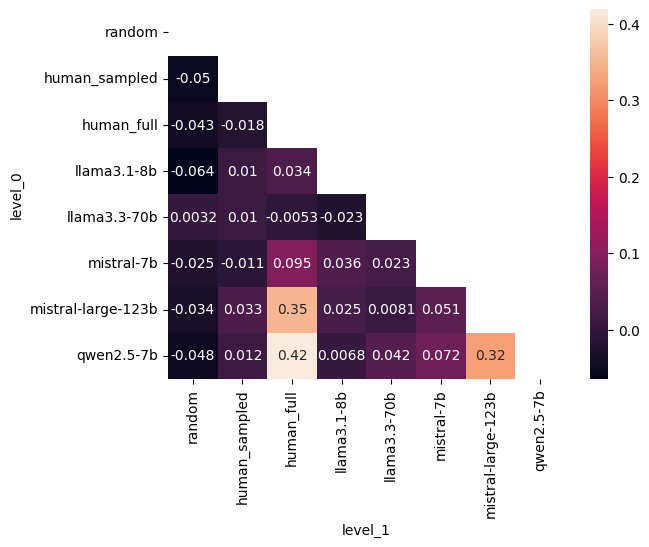

In [27]:
seaborn.heatmap(sim, annot=True, mask=numpy.triu(sim))

In [ ]:
human_chunked = {
    f"{n:02d}": chunk
    for n, chunk in enumerate(numpy.array_split(raw["human_full"].sample(frac=1.0), 100), start=1)
}

sim = (
    llmq.evaluation.apply_calc_similarity(human_chunked)
    .to_frame()
    .reset_index(level=[0,1])
    .pivot_table(values="similarity", index="level_0", columns="level_1")
    #
    .where(lambda df: pandas.DataFrame(
        [[i > j for j in range(len(df.columns))] for i in range(len(df.index))],
        index=df.index,
        columns=df.columns
    ))
    
)
sim

print(sim.pipe(llmq.evaluation.format_latex_df))
print({
    "mean": sim.stack().mean(),
    "std": sim.stack().std()
})

/home/ubuntu/repositories/LLM-Questionnaires/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


<Axes: xlabel='level_1', ylabel='level_0'>

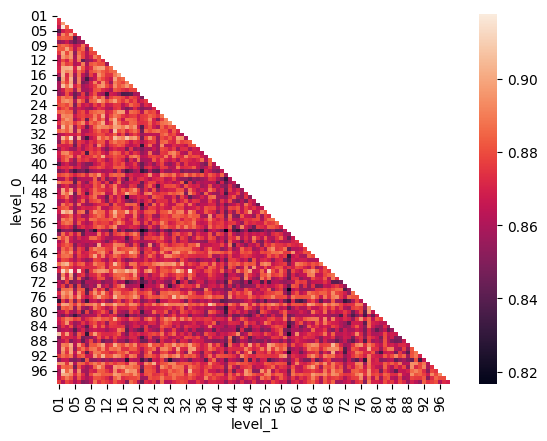

In [ ]:
seaborn.heatmap(sim, annot=False, mask=numpy.triu(sim))